In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Data

In [2]:
# Sample Size
n_samples = 500

# Define the Independent Variable/Feature
low, high = 0, 20
X = np.random.uniform(low=low, high=high, size=n_samples)

In [3]:
# Define the Dependent Variable/Outcome
distribution_mean, distribution_std = 0, 2.5
Y = 2*X + np.random.normal(loc=distribution_mean, scale=distribution_std, size=n_samples)

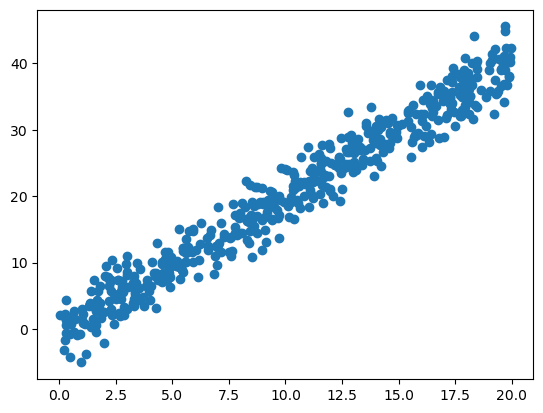

In [4]:
plt.scatter(X, Y);

### Gradient Descent from Scratch

In [5]:
def gradient_descent(x: np.array, y: np.array, learning_rate=0.001, n_iterations=100):
    """ This function takes in the predictor and outcome as input. It runs GD algorithm on it and
     returns the result after the specified no of iterations are completed. 
    
    :param x: X
    :param y: Y
    :param learning_rate: Learning Rate/ Update Factor
    :param n_iterations: No of iterations of GD to be applied
    :return: None
    """
    n_samples, n_predictors = x.shape
            
    weights, bias = np.zeros(n_predictors), 0
    
    weights_history, bias_history = [weights], [bias]
    
    for _ in range(n_iterations):
        y_predicted = np.dot(x, weights) + bias
        
        delta_weights = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
        delta_bias = (1 / n_samples) * np.sum(y_predicted - y)
        
        weights = weights - learning_rate * delta_weights
        bias = bias - learning_rate * delta_bias
        
        weights_history.append(weights)
        bias_history.append(bias)
    
    plt.plot(range(n_iterations + 1), bias_history)
    plt.title(f"Bias Evolution over {n_iterations} iterations")
    plt.grid()
    plt.show()
    
    for pred_idx in range(n_predictors):
        plt.plot(range(n_iterations + 1), [ls[pred_idx] for ls in weights_history])
        plt.title(f"Evolution of Weight 'x_{pred_idx}'over {n_iterations} iterations")
        plt.grid()
        plt.show()
    
    # TODO: ZipSort x and y for multivariate input.
    for idx in range(n_predictors):
        plt.scatter(x[:, idx], y)
        plt.plot(x[:, idx], np.dot(x, weights) + bias, color="red")
        plt.title(f"Fit of the GD Line on the predictor 'x_{idx}'")
        plt.grid()
        plt.show()
    
    print("Final MSE value: ", np.square(y - np.dot(x, weights) + bias).sum() / n_samples)
    return weights, bias

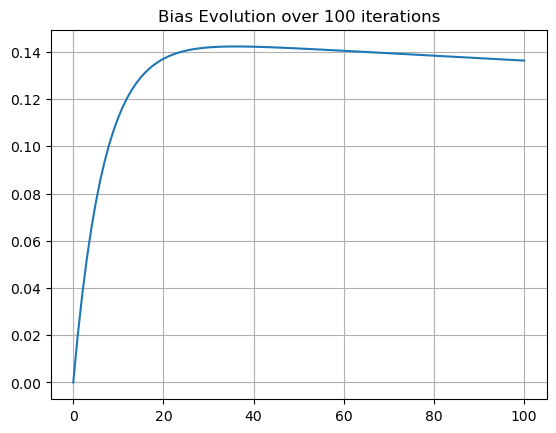

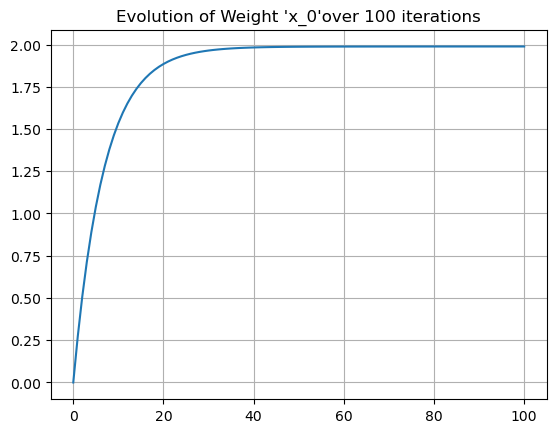

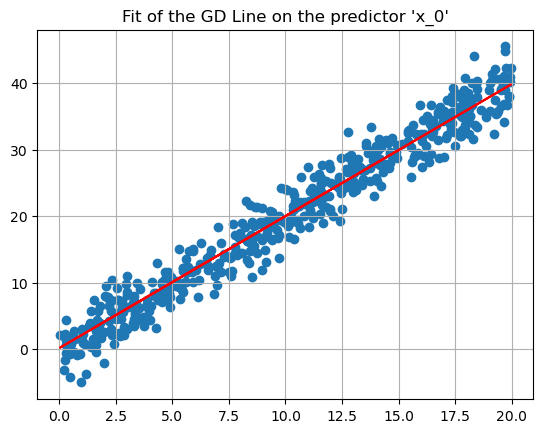

Final MSE value:  6.149082686510552


(array([1.98830881]), 0.1362765908209365)

In [6]:
gradient_descent(X.reshape(-1, 1), Y)

### Multivariate Example

In [7]:
# Sample Size
n_samples = 500

# Define the Independent Variable/Feature
low, high = 0, 20
X = np.random.uniform(low=low, high=high, size=(n_samples, 3))

In [8]:
# Define the Dependent Variable/Outcome
distribution_mean, distribution_std = 0, 2.5
Y = 2*X[:, 0] + 3*X[:, 1] -4*X[:, 2] + np.random.normal(loc=distribution_mean, scale=distribution_std, size=n_samples)

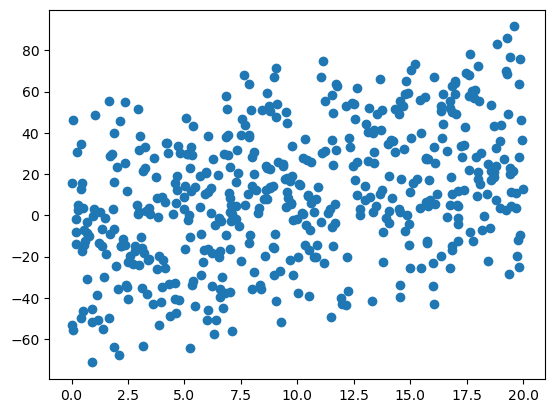

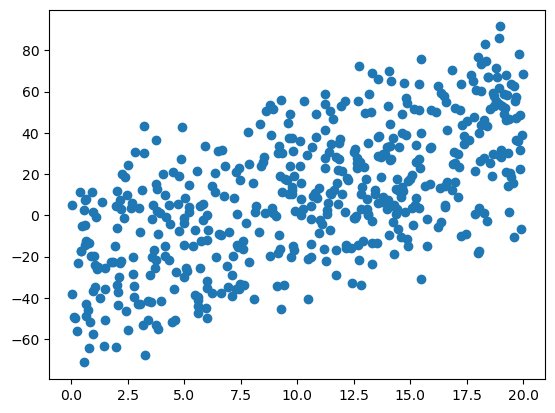

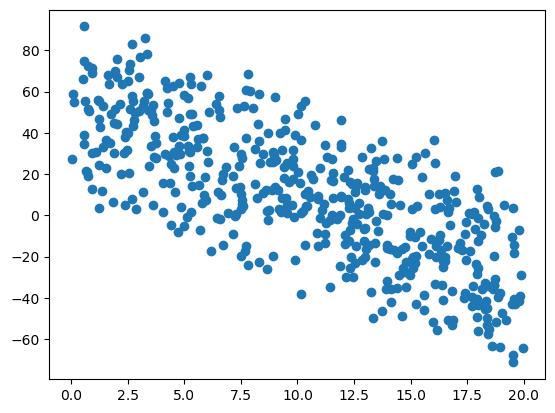

In [9]:
for idx in range(3):
    plt.scatter(X[:, idx], Y);
    plt.show()

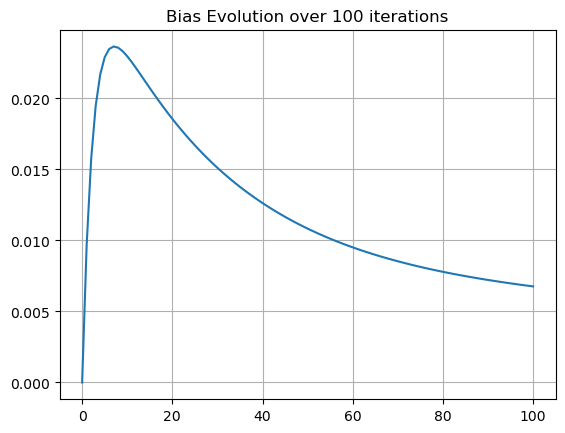

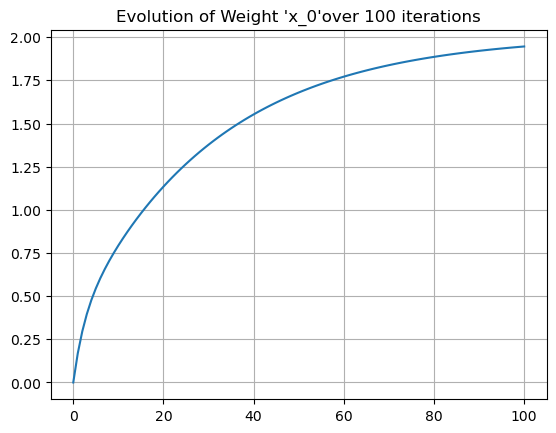

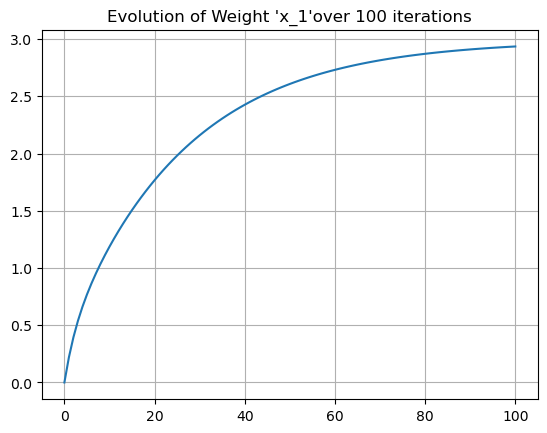

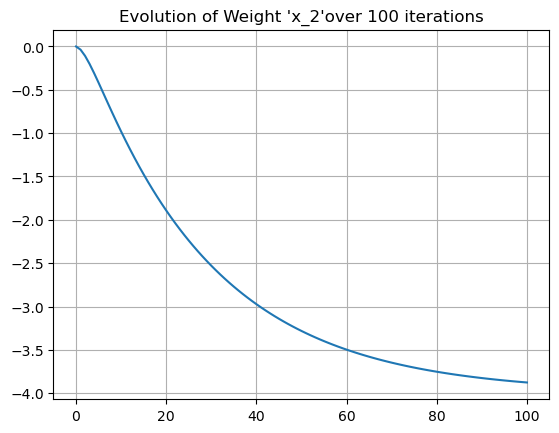

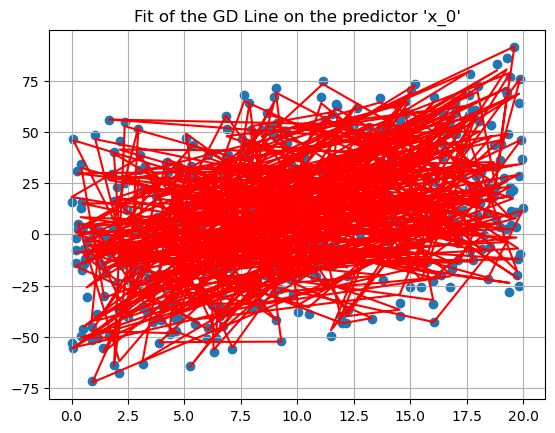

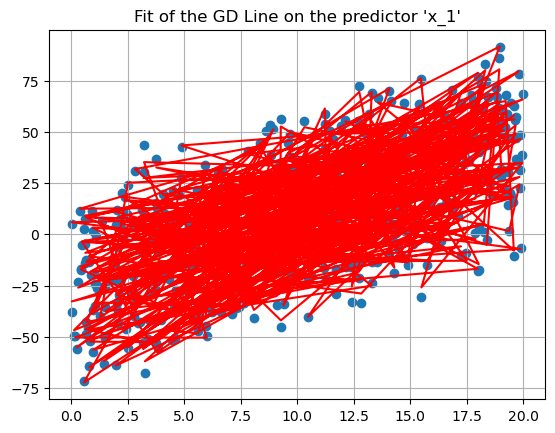

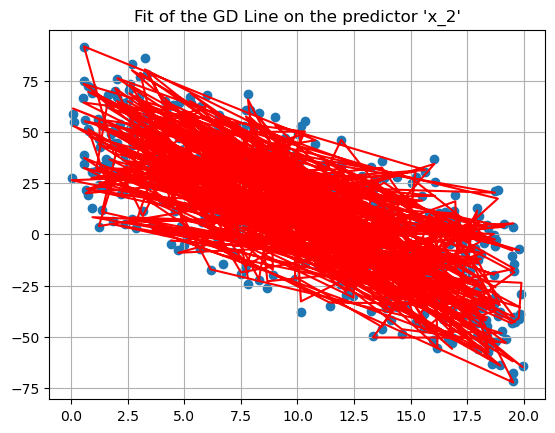

Final MSE value:  6.954405917506116


(array([ 1.94612664,  2.93506688, -3.8764317 ]), 0.006763957068772482)

In [10]:
gradient_descent(X, Y)